# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
from bokeh.core.property.vectorization import value
from ydata_profiling import ProfileReport
import pandas as pd

# Einlesen des Datensatzes
data = pd.read_csv('./data/stadtgarage.csv') 

# Report in Variable speichern
profile = ProfileReport(data, title="Stadtgarage Auslastung", tsmode=True, explorative=True)

profile.to_notebook_iframe()

#profile.to_file("report.json")
#json_data = profile.to_json()

# Report exportieren
profile.to_file(output_file='report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


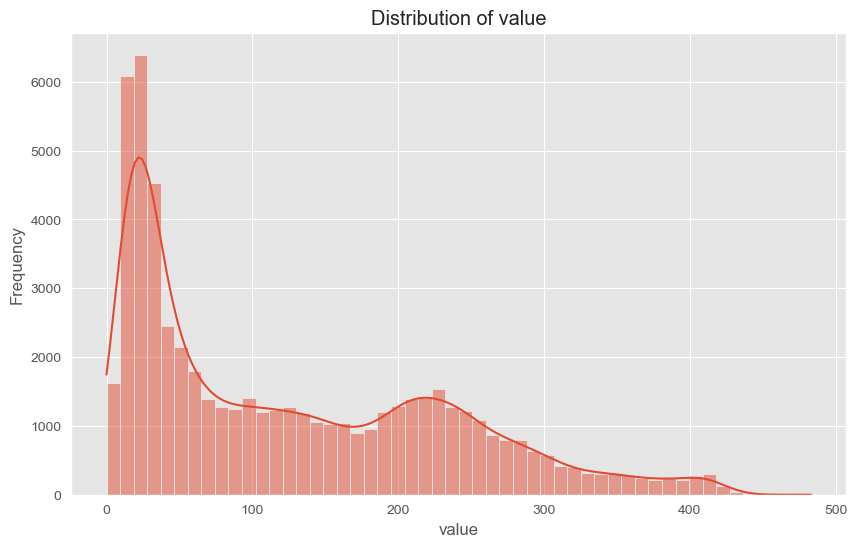

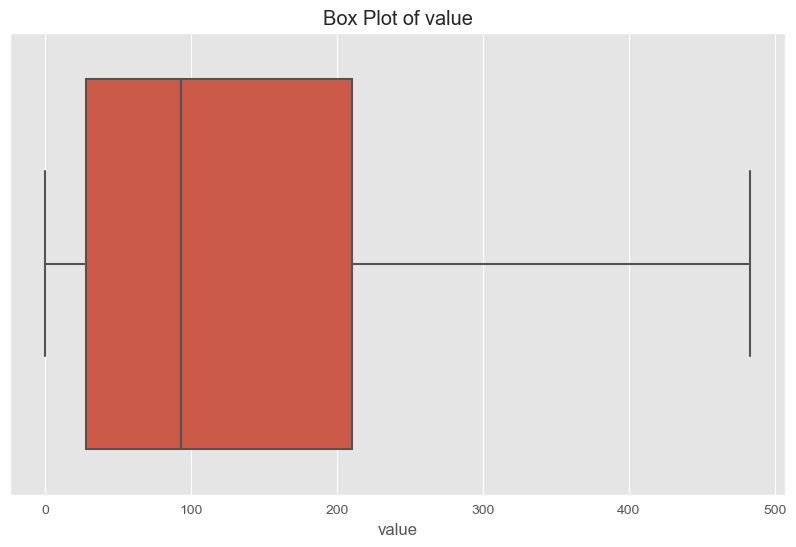


Summary Statistics for value:
count    57973.000000
mean       124.579218
std        106.645563
min          0.000000
25%         28.000000
50%         93.000000
75%        210.000000
max        483.000000
Name: value, dtype: float64

--------------------------------------------------



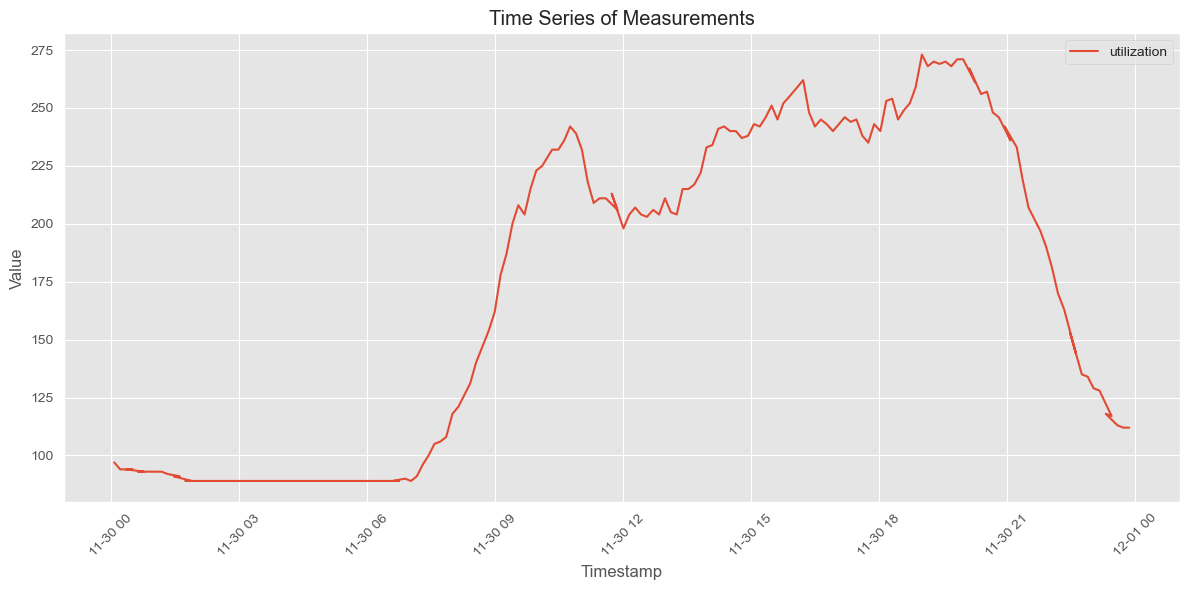

In [5]:
# Importieren benötigter Bibliotheken
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Festlegen der Visualisierungseinstellungen (Nicht unbedingt nötig)
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Einlesen des Datensatzes
data = pd.read_csv('./data/stadtgarage.csv') 

data = data.replace([np.inf, -np.inf], np.nan)

data = data[data['measurement_name'] == 'utilization']

# Ausgabe der ersten Zeilen des Datensatzes
data.head()

# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    
    # Histogram with KDE
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    
    # Summary statistics
    print(f"\nSummary Statistics for {column}:")
    print(data[column].describe())
    print("\n" + "-"*50 + "\n")
    
    # Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Get data from a specific date range
start_date = pd.to_datetime('2023-11-30')
end_date = pd.to_datetime('2023-12-01')
filtered_df = data[(data['timestamp'] >= start_date) & (data['timestamp'] <= end_date)]

# Time series plot
plt.figure(figsize=(12, 6))
for name in filtered_df['measurement_name'].unique():
    filtered_df = filtered_df[filtered_df['measurement_name'] == name]
    plt.plot(filtered_df['timestamp'], filtered_df['value'], label=name)

plt.title('Time Series of Measurements')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


trend: 
 0                NaN
2                NaN
4                NaN
6         237.714286
8         231.142857
             ...    
115936    261.428571
115938    265.285714
115940           NaN
115942           NaN
115944           NaN
Name: trend, Length: 57973, dtype: float64 
seasonal: 
 0        -0.756785
2        -0.848648
4         0.459131
6         0.455094
8         0.704632
            ...   
115936   -0.848648
115938    0.459131
115940    0.455094
115942    0.704632
115944    0.555185
Name: seasonal, Length: 57973, dtype: float64 
resid: 
  0               NaN
2               NaN
4               NaN
6        -10.169380
8          3.152510
            ...    
115936     5.420076
115938   -15.744845
115940          NaN
115942          NaN
115944          NaN
Name: resid, Length: 57973, dtype: float64 
stationary_resid: 
  8         13.321890
10        -2.993410
12        -2.304777
14        -1.954681
16         3.234720
            ...    
115930   -26.136267
115932    19.

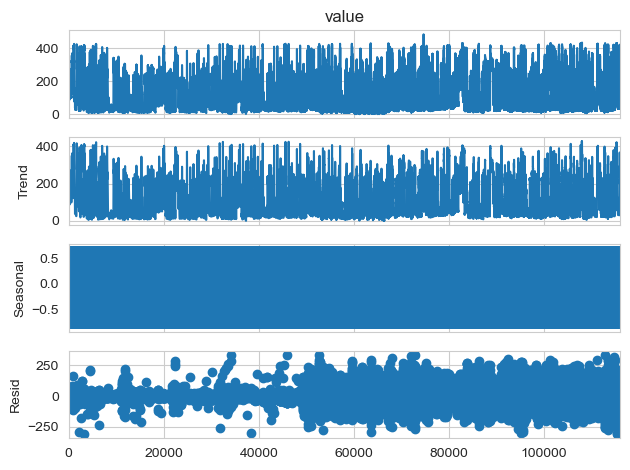

In [109]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose 

data = pd.read_csv('./data/stadtgarage.csv') 
df = pd.DataFrame(data)
df_filtered = df[df['measurement_name'] == 'utilization']

# ETS Decomposition 
result = seasonal_decompose(df_filtered['value'], model='additive', period=24)
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Stationarisieren (z.B. Differenzieren der Residuen)
stationary_resid = resid.dropna().diff().dropna()
print("trend: \n", trend, "\nseasonal: \n", seasonal, "\nresid: \n ",  resid, "\nstationary_resid: \n ", stationary_resid)
# ETS plot  
result.plot()
pyplot.show()

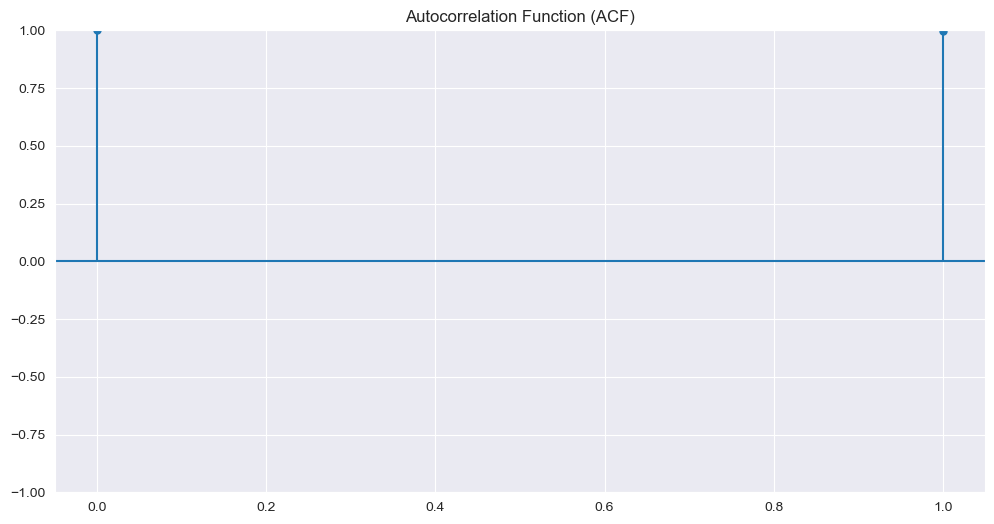

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=18.98 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=170510.189, Time=0.52 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=13.59 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=22.90 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=170508.191, Time=0.41 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=168966.135, Time=4.31 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=168122.171, Time=14.36 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=167513.131, Time=58.82 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=167529.385, Time=20.97 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=57.81 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=79.28 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=79.95 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=76.12 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=85.49 sec
 ARIMA(0,0,0)(2,1,1)[12]            

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                15373
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood              -83751.566
Date:                    Sat, 03 May 2025   AIC                         167511.132
Time:                            22:27:17   BIC                         167541.690
Sample:                                 0   HQIC                        167521.259
                                  - 15373                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2179      0.017    -12.740      0.000      -0.251      -0.184
ar.S.L24      -0.0483      0.011     -4.256      0.000      -0.070      -0.026
ma.S.L12       0.6594      0.016     40.525      0.000       0.627       0.691
sigma2      3185.3184     23.516    135.452      0.000    3139.227    3231.409
===================================================================================
Ljung-Box (L1) (Q):               14573.25   Jarque-Bera (JB):              6089.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
import statsmodels.api as sm
import statsmodels
import pandas as pd 
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

data = pd.read_csv('./data/stadtgarage.csv') 
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

start_date = pd.to_datetime('2023-11-30')
end_date = pd.to_datetime('2024-11-12')
df =df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

end_date_first_month = pd.to_datetime('2024-02-29')
df_filtered_small = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date_first_month)]
df_filtered_small.set_index('timestamp', inplace=True)
df_filtered_small =df_filtered_small[df_filtered_small['measurement_name'] == 'utilization']

df.set_index('timestamp', inplace=True)
df_filtered = df[df['measurement_name'] == 'utilization']

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
sm.tsa.acf(df_filtered['value'], nlags= 1)
fig = tsaplots.plot_acf(df_filtered['value'], lags= 1, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()



# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_filtered_small['value'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 
# Calculate PACF
#pacf_values = sm.tsa.pacf(df_filtered['value'], nlags=40)

# Plot PACF
#sm.graphics.tsa.plot_pacf(df_filtered['value'], lags=40, method="ldb")
#plt.show()

#statsmodels.graphics.tsaplots.plot_pacf(df_filtered['value'], ax=None, lags=None, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation2', zero=True, vlines_kwargs=None)
#plt.show()

#Ein schneller Abfall der partiellen Autokorrelation deutet darauf hin, dass ein AR-Modell besser geeignet ist.
# Plot Partial Autocorrelation Function (PACF)
#plt.figure(figsize=(12, 6))
#sm.graphics.tsa.plot_pacf(df_filtered['value'], lags=1000, method="ywm", ax=plt.gca())
#plt.title('Partial Autocorrelation Function (PACF)')
#plt.show()



            timestamp      value
0 2024-04-01 00:00:00  48.571429
1 2024-04-01 01:00:00  34.428571
2 2024-04-01 02:00:00  25.857143
3 2024-04-01 03:00:00  20.500000
4 2024-04-01 04:00:00  19.571429
576
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[168] intercept   : AIC=inf, Time=24.65 sec
 ARIMA(0,0,0)(0,0,0)[168] intercept   : AIC=6908.193, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[168] intercept   : AIC=inf, Time=17.60 sec
 ARIMA(0,0,1)(0,0,1)[168] intercept   : AIC=inf, Time=14.68 sec
 ARIMA(0,0,0)(0,0,0)[168]             : AIC=7398.490, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[168] intercept   : AIC=inf, Time=16.85 sec
 ARIMA(0,0,0)(0,0,1)[168] intercept   : AIC=inf, Time=11.12 sec
 ARIMA(0,0,0)(1,0,1)[168] intercept   : AIC=inf, Time=13.22 sec
 ARIMA(1,0,0)(0,0,0)[168] intercept   : AIC=5897.442, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[168] intercept   : AIC=inf, Time=15.44 sec
 ARIMA(1,0,0)(1,0,1)[168] intercept   : AIC=5674.809, Time=20.41 sec
 ARIMA(1,0,0)(2,0,1)[168] intercep

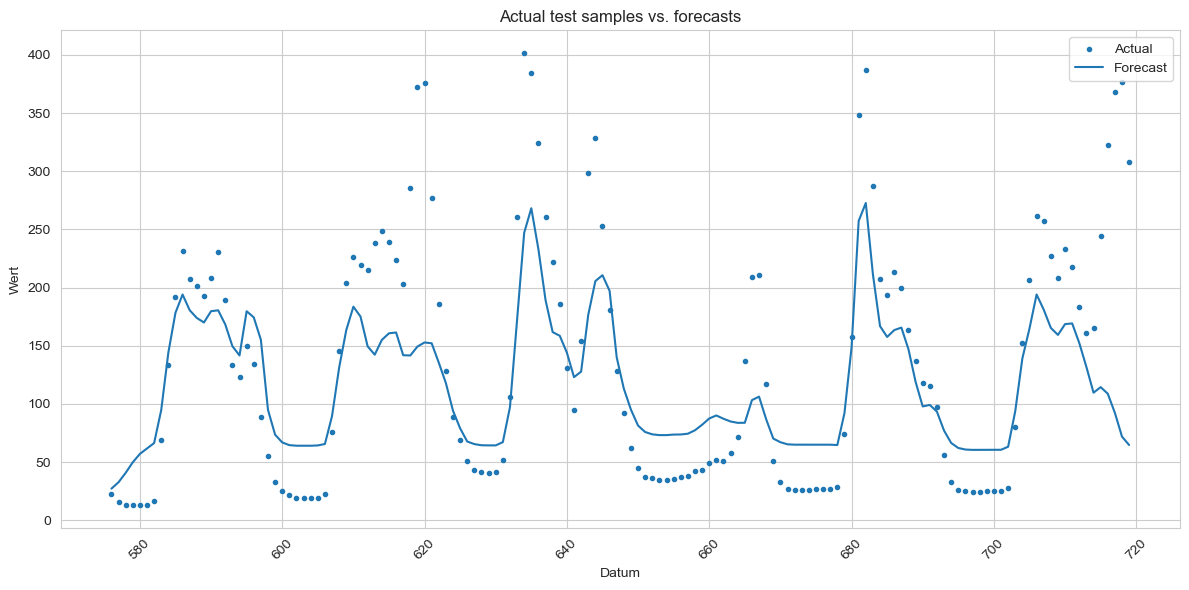

In [4]:
import pandas as pd
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('./data/stadtgarage.csv')
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

start_date = pd.to_datetime('2023-11-30')
end_date = pd.to_datetime('2024-11-12')
train_date_start = pd.to_datetime('2024-04-01')
train_date_end = pd.to_datetime('2024-05-01')

df =df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
df_filtered = df[df['measurement_name'] == 'utilization']
df_filtered_train = df_filtered[(df_filtered['timestamp'] >= train_date_start) & (df_filtered['timestamp'] <= train_date_end)]

df_filtered_train.set_index('timestamp', inplace=True)

df_filetered_hourly_train = df_filtered_train['value'].resample('1H').mean()

df_filetered_hourly_train = df_filetered_hourly_train.reset_index()
df_filetered_hourly_train = df_filetered_hourly_train.dropna()
print(df_filetered_hourly_train.head())

#time_windows = [
 #   ('2023-11-30', '2024-02-29'),
  #  ('2024-03-01', '2024-05-31'),
   # ('2024-06-01', '2024-08-31'),
    #('2024-09-01', '2024-10-31'),
    #('2024-11-01', '2024-11-12'),
#]

#for i, (start_str, end_str) in enumerate(time_windows):
 #   start = pd.to_datetime(start_str)
  #  end = pd.to_datetime(end_str)

    # Fenster extrahieren
   # window_df = df_filetered_hourly_train[
    #    (df_filetered_hourly_train['timestamp'] >= start) &
     #   (df_filetered_hourly_train['timestamp'] <= end)
    #]

   # window_df.set_index('timestamp', inplace=True)

    # Train/Test Split (z.B. 80%/20%)
train_size = int(len(df_filetered_hourly_train) * 0.8)
print(train_size)
#train, test = df_filetered_hourly_train['value'][:train_size], df_filetered_hourly_train['value'][train_size:]
train, test = model_selection.train_test_split(df_filetered_hourly_train['value'], train_size= train_size)

arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=168)

#forecast = arima.predict(n_periods=12)

   # plt.figure(i+1)
x = test.index
plt.figure(figsize=(12, 6))
plt.scatter(x, test, marker='.', label='Actual')
plt.plot(x, arima.predict(n_periods=test.shape[0]), label='Forecast')
#plt.plot(x, arima.predict(n_periods=len(test)), label='Forecast')
#plt.title(f'Fenster {i+1}: {start_str} bis {end_str}')
plt.title('Actual test samples vs. forecasts')
plt.xlabel('Datum')
plt.ylabel('Wert')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()



plt.show()





Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=16083.295, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=17372.182, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=16499.964, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=16432.217, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=17370.184, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=16169.084, Time=0.44 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=16162.759, Time=0.53 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=15871.679, Time=1.44 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=15874.494, Time=1.40 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=15824.940, Time=1.50 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=15940.155, Time=1.35 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=15835.267, Time=1.30 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=15809.506, Time=1.46 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=15933.799, Time=1.38 sec
 ARIM

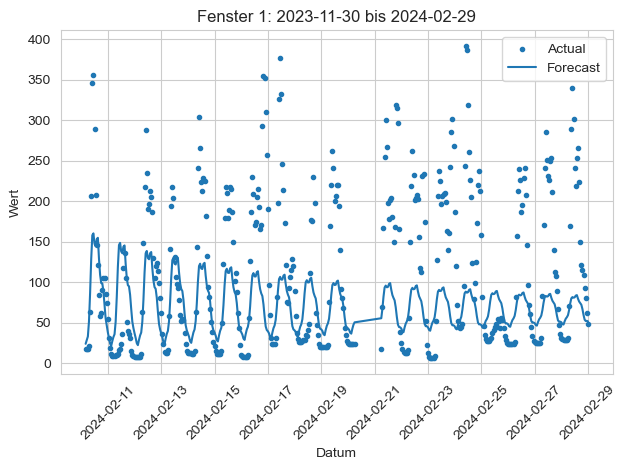

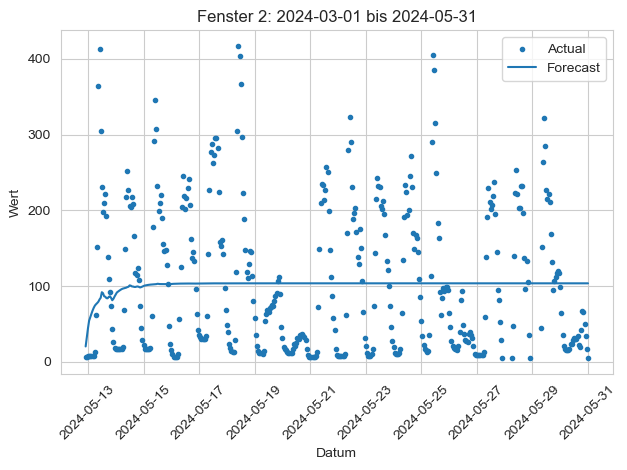

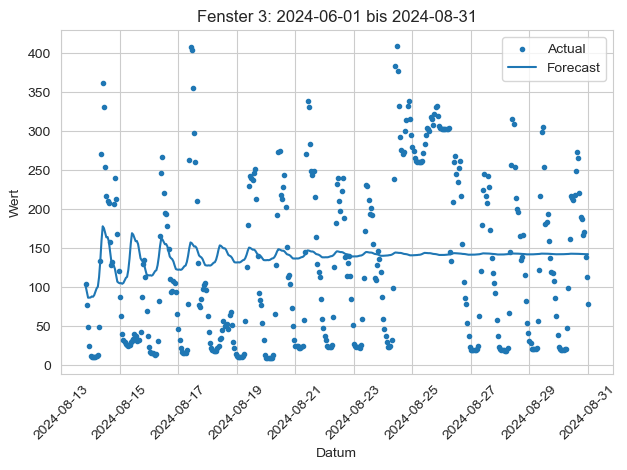

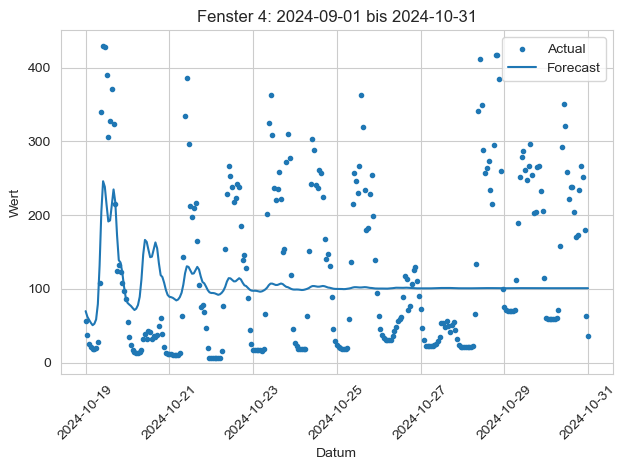

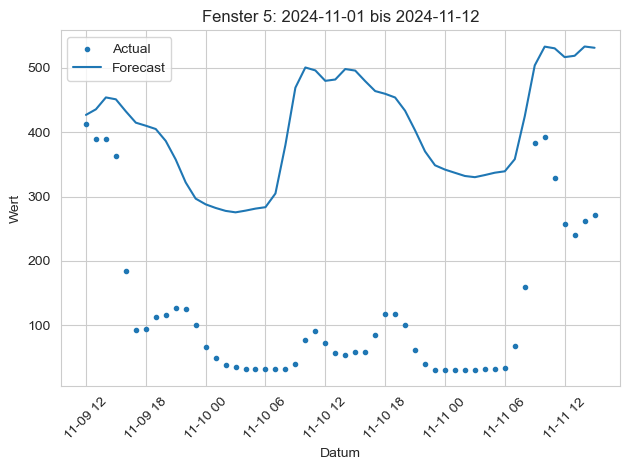

In [101]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('./data/stadtgarage.csv')
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')



start_date = pd.to_datetime('2023-11-30')
end_date = pd.to_datetime('2024-11-12')
train_date_start = pd.to_datetime('2024-04-01')
train_date_end = pd.to_datetime('2024-08-01')

df =df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
df_filtered = df[df['measurement_name'] == 'utilization']

dates_to_exclude = pd.to_datetime([
    '2024-02-05', '2024-02-04', '2024-08-05', '2024-08-26',
    '2024-08-06', '2023-12-05', '2024-03-06', '2024-08-07',
    '2024-07-10', '2024-05-08', '2024-03-07', '2024-07-11',
    '2024-08-08', '2023-12-03'
]).date

df_filtered = df_filtered[~df_filtered['timestamp'].dt.date.isin(dates_to_exclude)]


df_filtered_train = df_filtered[(df_filtered['timestamp'] >= train_date_start) & (df_filtered['timestamp'] <= train_date_end)]

df_filtered_train.set_index('timestamp', inplace=True)


df_filtered_hourly_train = df_filtered_train['value'].resample('1H').mean()


df_filtered_hourly_train = df_filetered_hourly_train.reset_index()# oder .median(), .first(), je nach Anwendungsfall
df_filtered_hourly_train = df_filetered_hourly_train.dropna()

time_windows = [
    ('2023-11-30', '2024-02-29'),
    ('2024-03-01', '2024-05-31'),
    ('2024-06-01', '2024-08-31'),
    ('2024-09-01', '2024-10-31'),
    ('2024-11-01', '2024-11-12'),
]

for i, (start_str, end_str) in enumerate(time_windows):
    start = pd.to_datetime(start_str)
    end = pd.to_datetime(end_str)

    # Fenster extrahieren
    window_df = df_filetered_hourly_train[
        (df_filetered_hourly_train['timestamp'] >= start) &
        (df_filetered_hourly_train['timestamp'] <= end)
    ]

    window_df.set_index('timestamp', inplace=True)

    # Train/Test Split (z.B. 80%/20%)
    train_size = int(len(window_df) * 0.8)
    train, test = window_df['value'][:train_size], window_df['value'][train_size:]
    arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)
    plt.figure(i+1)
    x = test.index
    plt.scatter(x, test, marker='.', label='Actual')
    plt.plot(x, arima.predict(n_periods=len(test)), label='Forecast')
    plt.title(f'Fenster {i+1}: {start_str} bis {end_str}')
    plt.xlabel('Datum')
    plt.ylabel('Wert')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

            timestamp      value
0 2024-01-01 00:00:00  29.857143
1 2024-01-01 01:00:00  25.000000
2 2024-01-01 02:00:00  22.000000
3 2024-01-01 03:00:00  21.857143
4 2024-01-01 04:00:00  21.000000
592
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[168] intercept   : AIC=inf, Time=23.42 sec
 ARIMA(0,0,0)(0,0,0)[168] intercept   : AIC=6976.230, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[168] intercept   : AIC=inf, Time=13.43 sec
 ARIMA(0,0,1)(0,0,1)[168] intercept   : AIC=inf, Time=10.28 sec
 ARIMA(0,0,0)(0,0,0)[168]             : AIC=7476.104, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[168] intercept   : AIC=inf, Time=9.68 sec
 ARIMA(0,0,0)(0,0,1)[168] intercept   : AIC=inf, Time=10.84 sec
 ARIMA(0,0,0)(1,0,1)[168] intercept   : AIC=inf, Time=10.96 sec
 ARIMA(1,0,0)(0,0,0)[168] intercept   : AIC=5804.301, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[168] intercept   : AIC=inf, Time=16.93 sec
 ARIMA(1,0,0)(1,0,1)[168] intercept   : AIC=5753.286, Time=17.61 sec
 ARIMA(1,0,0)(2,0,1)[168] intercept

/Users/vroni/miniconda3/envs/ParkData/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


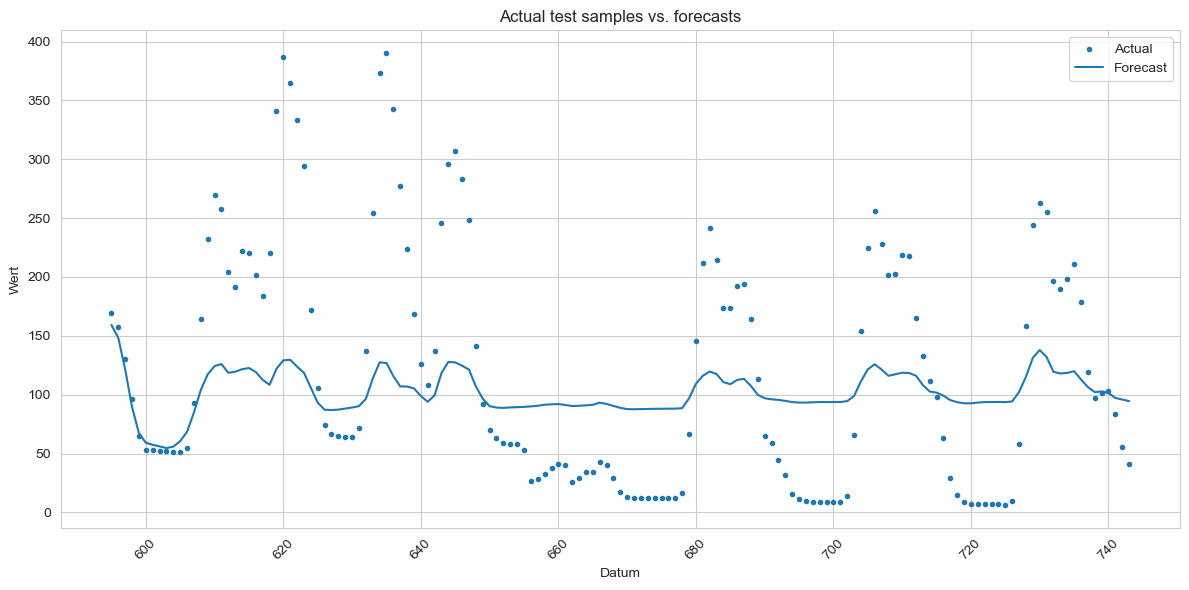

In [1]:
import pandas as pd
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('./data/stadtgarage.csv')
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

start_date = pd.to_datetime('2023-11-30')
end_date = pd.to_datetime('2024-11-12')
train_date_start = pd.to_datetime('2024-01-01')
train_date_end = pd.to_datetime('2024-02-01')

df =df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
df_filtered = df[df['measurement_name'] == 'utilization']
df_filtered_train = df_filtered[(df_filtered['timestamp'] >= train_date_start) & (df_filtered['timestamp'] <= train_date_end)]

df_filtered_train.set_index('timestamp', inplace=True)

df_filetered_hourly_train = df_filtered_train['value'].resample('1H').mean()

df_filetered_hourly_train = df_filetered_hourly_train.reset_index()
df_filetered_hourly_train = df_filetered_hourly_train.dropna()
print(df_filetered_hourly_train.head())

train_size = int(len(df_filetered_hourly_train) * 0.8)
print(train_size)

train, test = model_selection.train_test_split(df_filetered_hourly_train['value'], train_size= train_size)

arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=168)

x = test.index
plt.figure(figsize=(12, 6))
plt.scatter(x, test, marker='.', label='Actual')
plt.plot(x, arima.predict(n_periods=test.shape[0]), label='Forecast')
plt.title('Actual test samples vs. forecasts')
plt.xlabel('Datum')
plt.ylabel('Wert')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()